In [1]:
import urllib.request
import zipfile
import tensorflow as tf
import os
import scipy as sp
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from PIL import Image
from keras.regularizers import l2
from keras.layers import Dropout
import datetime


2023-11-26 18:46:35.001598: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 18:46:35.191503: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 18:46:35.191542: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 18:46:35.192574: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 18:46:35.285382: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 18:46:35.286883: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
!rm -rf ./logs/ 

In [3]:
TRAINING_DIR = 'data/train'
train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values between 0 and 1

# Load training data
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=128, # 128 images per batch 
    class_mode='categorical' # binary labels
    )

        
VALIDATION_DIR = 'data/validation'
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values between 0 and 1

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(150, 150),  # Resize images to 150x150        
batch_size=32,
class_mode='categorical')

Found 1500 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [4]:
num_classes = len(train_generator.classes)
print(f'Number of classes: {num_classes}')

Number of classes: 1500


In [5]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(150, 150, 3)),
   tf.keras.layers.MaxPooling2D(2, 2),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
   tf.keras.layers.MaxPooling2D(2, 2),
   tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
   tf.keras.layers.MaxPooling2D(2, 2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dense(128, activation='relu'),
   tf.keras.layers.Dense(3, activation='softmax'),
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [6]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics=['acc'],
)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    train_generator,
    epochs=5,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[tensorboard_callback]
)

Epoch 1/5


2023-11-26 18:46:40.572080: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 358875136 exceeds 10% of free system memory.
2023-11-26 18:46:40.817404: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.
2023-11-26 18:46:40.890252: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169869312 exceeds 10% of free system memory.
2023-11-26 18:46:41.099527: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.
2023-11-26 18:46:41.279750: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.


12/12 [==============================] - 28s 2s/step - loss: 2.0160 - acc: 0.5373 - val_loss: 1.6767 - val_acc: 0.5556
Epoch 2/5
12/12 [==============================] - 23s 2s/step - loss: 1.3824 - acc: 0.7033 - val_loss: 1.1420 - val_acc: 0.8611
Epoch 3/5
12/12 [==============================] - 24s 2s/step - loss: 1.0554 - acc: 0.8033 - val_loss: 0.8991 - val_acc: 0.8611
Epoch 4/5
12/12 [==============================] - 25s 2s/step - loss: 0.7982 - acc: 0.8687 - val_loss: 0.7139 - val_acc: 0.9111
Epoch 5/5
12/12 [==============================] - 28s 2s/step - loss: 0.6417 - acc: 0.9100 - val_loss: 0.6102 - val_acc: 0.9278


In [21]:
model.save('mask_classification.h5')

/home/baru_san/coding/kuliah/semester5/AI/praktikum/prak7/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Figure size 640x480 with 0 Axes>

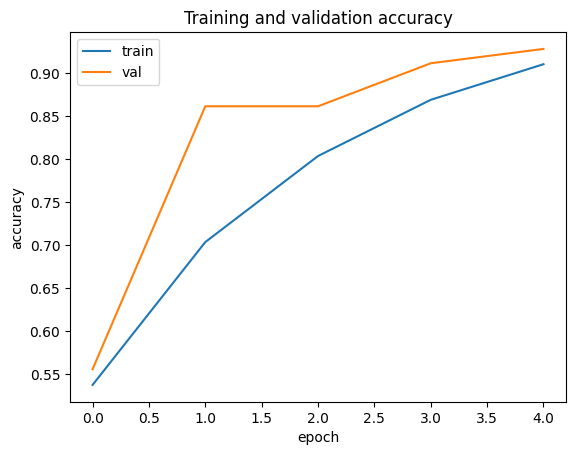

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data sets for each training epoch

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']


# Plot training and validation accuracy per epoch

plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

In [17]:
from keras.preprocessing import image
import numpy as np

def predict_image(img_path):
# Load the image
    img = image.load_img(img_path, target_size=(150, 150))

    # Convert the image to a numpy array
    img_tensor = image.img_to_array(img)

    # Expand dimensions for the model
    img_tensor = np.expand_dims(img_tensor, axis=0)

    # Normalize the image
    img_tensor /= 255.

    predictions = model.predict(img_tensor)

    predicted_class = np.argmax(predictions)

    class_names = ['memakai masker dengan cara tidak benar', 'memakai masker', 'tidak memakai masker']
    predicted_class_name = class_names[predicted_class]

    print(f"Foto orang terdeteksi {predicted_class_name}")


In [18]:
predict_image("data/test/mask_weared_incorrect/1.png")

1/1 [==============================] - 0s 29ms/step
Foto orang terdeteksi memakai masker dengan cara tidak benar


In [19]:
predict_image("data/test/with_mask/1.png")

1/1 [==============================] - 0s 21ms/step
Foto orang terdeteksi memakai masker


In [20]:
predict_image("data/test/without_mask/1.png")

1/1 [==============================] - 0s 23ms/step
Foto orang terdeteksi tidak memakai masker
